In [65]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [66]:
class BatsmanState(TypedDict):
    
    runs : int
    balls_faced : int
    strike_rate : float
    sixs : int
    fours : int
    
    balls_per_boundary : float
    boundary_percentage : float
    summary : str

In [67]:
def calculate_sr(state: BatsmanState) -> BatsmanState:
    sr = (state['runs'] / state['balls_faced']) * 100
    return  {'strike_rate': sr}

def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
    total_boundaries = state['fours'] + state['sixs']
    bp = (total_boundaries / state['balls_faced']) * 100
    return {'boundary_percentage': bp}

def calculate_balls_per_boundary(state: BatsmanState) -> BatsmanState:
    total_boundaries = state['fours'] + state['sixs']
    bpb = state['balls_faced'] / total_boundaries
    return {'balls_per_boundary': bpb}

def create_batsman_summary(state: BatsmanState):
    summary = f"""
    strike_rate: {state['strike_rate']}\n
    balls_per_boundary: {state['balls_per_boundary']}\n
    boundary_percentage: {state['boundary_percentage']}
    """
    state['summary'] = summary.strip()
    return {'summary': summary}


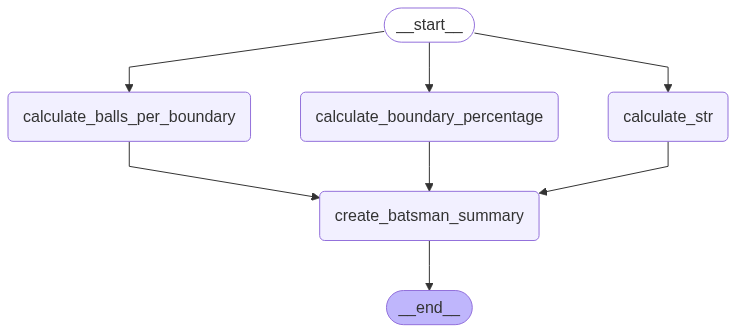

In [68]:
graph = StateGraph(BatsmanState)

#create node
graph.add_node('calculate_str', calculate_sr)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
graph.add_node('create_batsman_summary', create_batsman_summary)    

#add edges
graph.add_edge(START, 'calculate_str')
graph.add_edge(START, 'calculate_boundary_percentage')
graph.add_edge(START, 'calculate_balls_per_boundary')

graph.add_edge('calculate_str','create_batsman_summary')
graph.add_edge('calculate_boundary_percentage', 'create_batsman_summary')
graph.add_edge('calculate_balls_per_boundary', 'create_batsman_summary')

graph.add_edge('create_batsman_summary', END) 

#complite the graph
workflow = graph.compile()
workflow

In [69]:
initial_state = BatsmanState(
    runs=100,
    balls_faced=50,
    sixs=5,     
    fours=10,
)
workflow.invoke(initial_state)   


{'runs': 100,
 'balls_faced': 50,
 'strike_rate': 200.0,
 'sixs': 5,
 'fours': 10,
 'balls_per_boundary': 3.3333333333333335,
 'boundary_percentage': 30.0,
 'summary': '\n    strike_rate: 200.0\n\n    balls_per_boundary: 3.3333333333333335\n\n    boundary_percentage: 30.0\n    '}